# Titanic Data predictions

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. 

It gives us information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster.

In this project, we tend to predict if the passenger survived or not, based on the details shared.

The problem is a binary classification problem, which predicts 1/Y for survivors and 0/N for non-survivors.

# Importing the necessary libraries

In [1160]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [1161]:
#import titanic dataset using a csv file
data = pd.read_csv('titanic.csv')

In [1162]:
#display the data
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [1163]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [1164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1165]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [1166]:
#print a sample of data to check what are the different types of data available in the set
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
581,582,1,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.0,1,1,17421,110.8833,C68,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
768,769,0,3,"Moran, Mr. Daniel J",male,NaN,1,0,371110,24.1500,NaN,Q
239,240,0,2,"Hunt, Mr. George Henry",male,33.0,0,0,SCO/W 1585,12.2750,NaN,S
400,401,1,3,"Niskanen, Mr. Juha",male,39.0,0,0,STON/O 2. 3101289,7.9250,NaN,S


Looking at the data types and the sample, there seems to be some problem in the ticket column as the data is of type Object and the sample has integer values. Lets check some more samples

In [1167]:
data.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
580,581,1,2,"Christy, Miss. Julie Rachel",female,25.00,1,1,237789,30.0000,NaN,S
203,204,0,3,"Youseff, Mr. Gerious",male,45.50,0,0,2628,7.2250,NaN,C
426,427,1,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,28.00,1,0,2003,26.0000,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.00,0,0,LINE,0.0000,NaN,S
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.00,2,0,350026,14.1083,NaN,S
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.00,3,1,349909,21.0750,NaN,S
525,526,0,3,"Farrell, Mr. James",male,40.50,0,0,367232,7.7500,NaN,Q
735,736,0,3,"Williams, Mr. Leslie",male,28.50,0,0,54636,16.1000,NaN,S
757,758,0,2,"Bailey, Mr. Percy Andrew",male,18.00,0,0,29108,11.5000,NaN,S
783,784,0,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.4500,NaN,S


We see that there are some entries in the column starting with alphabetical prefix which result in the object data type. Going further we will check for null values as well, to be sure we don't have null values/incorrect values in the ticket column.

Lets analyse a count for survivors and non-survivors in the training data, to have an idea of survival/death ratio.

In [1168]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

We observe that number of survivors is 38% only, and rest of the passengers died.

# Identifying and treating missing values

In [1169]:
#check the columns with null values, this command gives a sum of all null values differentiated column wise
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From the result command, we recognize that there are null values in Age,cabin and Embarked column.

Age has 177 missing values,
Cabin has 687 missing values,
Embarked has 2 missing values

(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <a list of 20 Patch objects>)

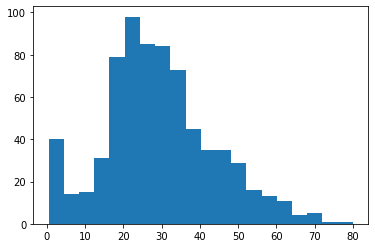

In [1170]:
#Lets check the distribution of data in Age column

import matplotlib.pyplot as plt
plt.hist(data['Age'], bins = 20)

Majority of the passengers are within the range of 25 - 52 age group.

Lets check the count of survivors and non-survivors for the rows in which age is missing.

In [1171]:
abc=data[data['Age'].isnull() == True]
abc[['Survived']]

,Survived
5,0
17,1
19,1
26,0
28,1
...,...
859,0
863,0
868,0
878,0


In [1172]:
abc['Survived'].value_counts()

0    125
1     52
Name: Survived, dtype: int64

Out of the rows in which the age is missing, 30% are survivors and rest are non-survivors. The ratio is almost similar (~9% diff).

Let us compare the correlation of Age column with other columns to check if we can use any other factor to determine what should be our criteria to handle missing values.

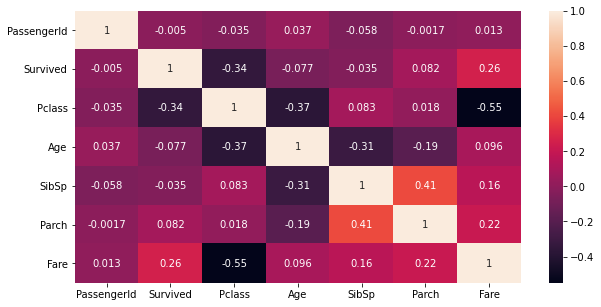

In [1173]:
correlation_data = data.corr()

plt.figure(figsize=(10,5))
sns.heatmap(correlation_data, annot = True)

Correlation is found as 37% with PClass column. Lets have a look at the data to check if we are able to deduce something.

In [1174]:
data[['Age','Pclass']].sample(20)

,Age,Pclass
550,17.00,1
586,47.00,2
518,36.00,2
803,0.42,3
842,30.00,1
69,26.00,3
19,NaN,3
334,NaN,1
81,29.00,3
877,19.00,3


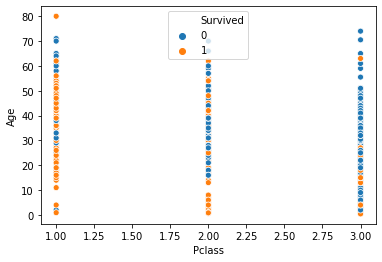

In [1175]:
#Plotting a scatterplot to compare age vs Pclass

sns.scatterplot(x = data['Pclass'], y = data['Age'], hue = data['Survived'])

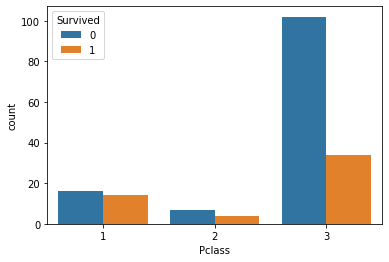

In [1176]:
sns.countplot(x = abc['Pclass'], hue = abc['Survived'])

In [1177]:
#From the above graph, we see that majority of the people belong in age 15 - 40
#Lets check the data description

data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [1178]:
#Checking the count of Pclass in the data where age is not available

abc['Pclass'].value_counts()

3    136
1     30
2     11
Name: Pclass, dtype: int64

We see that majority of the people whose Age is not available are from Pclass 3, where number of non-survivors is quite high.

Pclass 3 has survivors only till ~20 years of age, and rest are non-survivors.

Hence we can replace the 30% of the values with under 20 and rest of the values can be replaced with the mean value of the age, which is ~29. 

Age also has a 31% correlation with SibSp so lets analyse that data as well once.

In [1179]:
#Check unique values of SibSp in dataframe where age is unavailable

abc['SibSp'].value_counts()

0    137
1     26
8      7
3      4
2      3
Name: SibSp, dtype: int64

Majority of the values are 0, lets plot a graph to count survivors and non-survivors as per SibSp

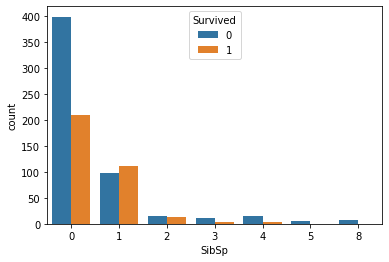

In [1180]:
sns.countplot(x = data['SibSp'], hue = data['Survived'])

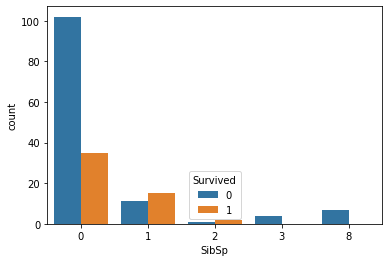

In [1181]:
sns.countplot(x = abc['SibSp'], hue = abc['Survived'])

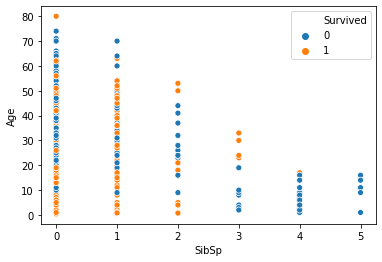

In [1182]:
sns.scatterplot(x = data['SibSp'], y = data['Age'], hue = data['Survived'])

Summary of the above 3 plots -

Number of passengers with SibSp 0 were the maximum in the complete data, the number of SibSp in the data where age is missing is also inclined towards 0.

The graphs state that with SibSp as 0, majority of the people were non-survivors, and the survivors are in age group 0 - 20, 40 - 65.

If our dataset, survivors are ~38% and in case of missing age data (19% data missing), 30% are the survivors.
Replacing 52 values will impact 5% of the population, and take survivors close to 35% as per the age.

So we stick to our observation, and replace survivors with values ~20 and rest with the mean values.

In [1183]:
for i in data.index:
    if data.isnull()['Age'][i] == True:
        if (data['Pclass'][i] == 3 and data['Survived'][i] == 1):
            data['Age'][i] = 18.0

In [1184]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [1185]:
data['Age'].isnull().sum()

143

In [1186]:
#Lets replace the remaining NaN values in age column by the mean value
data['Age'].fillna(data['Age'].mean(), inplace = True)
#The above code adds Age as float value

In [1187]:
data['Age'].isnull().sum()

0

In [1188]:
data['Age']

0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
         ...   
886    27.00000
887    19.00000
888    29.16734
889    26.00000
890    32.00000
Name: Age, Length: 891, dtype: float64

In [1189]:
#Convert age to int

import numpy as np
data.Age = data.Age.astype(np.int64)

In [1190]:
#Print data types

data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [1191]:
#Now lets move to the cabin column

data.Cabin.isnull().sum()


687

In [1192]:
# The column has 687 values as null, lets check what are the values present in this column

data['Cabin'].value_counts()


C23 C25 C27    4
B96 B98        4
G6             4
F2             3
F33            3
              ..
C47            1
B19            1
C110           1
B82 B84        1
B4             1
Name: Cabin, Length: 147, dtype: int64

Let us now create a dataframe by dropping NaN values to check how Cabin impacts the survival rate 

In [1193]:
cabin_survive = data[data['Cabin'].isnull() == False]

In [1194]:
cabin_survive

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S


In [1195]:
cabin_survive['Survived'].value_counts()

1    136
0     68
Name: Survived, dtype: int64

66% of the passengers for which the cabins are available survived.

In [1196]:
cabin_survive.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70,1,1,WE/P 5735,71.0000,B22,S
303,304,1,2,"Keane, Miss. Nora A",female,29,0,0,226593,12.3500,E101,Q
748,749,0,1,"Marvin, Mr. Daniel Warner",male,19,1,0,113773,53.1000,D30,S
291,292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19,1,0,11967,91.0792,B49,C
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S
102,103,0,1,"White, Mr. Richard Frasar",male,21,0,1,35281,77.2875,D26,S
815,816,0,1,"Fry, Mr. Richard",male,29,0,0,112058,0.0000,B102,S
681,682,1,1,"Hassab, Mr. Hammad",male,27,0,0,PC 17572,76.7292,D49,C
340,341,1,2,"Navratil, Master. Edmond Roger",male,2,1,1,230080,26.0000,F2,S
298,299,1,1,"Saalfeld, Mr. Adolphe",male,29,0,0,19988,30.5000,C106,S


In [1197]:
cabin_list = []

for i in cabin_survive.index:
    cabin_list.append(cabin_survive['Cabin'][i][0])

In [1198]:
cabin_list

['C',
 'C',
 'E',
 'G',
 'C',
 'D',
 'A',
 'C',
 'B',
 'D',
 'B',
 'C',
 'B',
 'C',
 'F',
 'F',
 'C',
 'E',
 'A',
 'D',
 'D',
 'C',
 'B',
 'E',
 'D',
 'F',
 'D',
 'C',
 'B',
 'F',
 'C',
 'E',
 'B',
 'A',
 'C',
 'F',
 'A',
 'F',
 'B',
 'B',
 'G',
 'A',
 'D',
 'D',
 'C',
 'C',
 'C',
 'D',
 'G',
 'C',
 'B',
 'E',
 'B',
 'C',
 'C',
 'C',
 'D',
 'A',
 'B',
 'D',
 'C',
 'C',
 'B',
 'E',
 'C',
 'C',
 'E',
 'C',
 'B',
 'C',
 'E',
 'C',
 'D',
 'B',
 'C',
 'C',
 'C',
 'E',
 'T',
 'F',
 'C',
 'F',
 'C',
 'E',
 'D',
 'B',
 'E',
 'C',
 'B',
 'D',
 'G',
 'C',
 'E',
 'C',
 'E',
 'B',
 'C',
 'A',
 'C',
 'C',
 'C',
 'E',
 'D',
 'E',
 'E',
 'D',
 'A',
 'B',
 'C',
 'B',
 'C',
 'D',
 'C',
 'B',
 'C',
 'E',
 'D',
 'F',
 'B',
 'B',
 'C',
 'B',
 'B',
 'B',
 'C',
 'C',
 'A',
 'E',
 'C',
 'E',
 'E',
 'C',
 'A',
 'E',
 'B',
 'D',
 'A',
 'C',
 'F',
 'D',
 'D',
 'D',
 'A',
 'B',
 'B',
 'D',
 'A',
 'D',
 'E',
 'C',
 'B',
 'B',
 'D',
 'B',
 'B',
 'C',
 'F',
 'C',
 'E',
 'E',
 'C',
 'C',
 'C',
 'F',
 'C',
 'E',
 'E'

In [1199]:
cabin_survive['Cabin_new'] = cabin_list

In [1200]:
cabin_survive['Cabin_new'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_new, dtype: int64

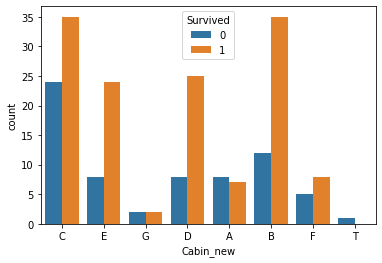

In [1201]:
sns.countplot(cabin_survive['Cabin_new'], hue = cabin_survive['Survived'])


Maximum number of survivors were from cabin B, C, D, E, and ratio between survivors and non-survivors is in cabin B.

Out of 342 survivors, 68 have a cabin assigned. We still have 274 survivors for which cabin data is not available. 

Since ~78% data is missing in 'Cabin' column, we will drop this column, as filling 78% of the data as per assumption would result in wrong predictions.

In [1202]:
data.drop('Cabin', axis = 1, inplace = True)

Treating the embarked column for missing values (2 in number), hence we will be replacing the NaN values by the mode of data.

In [1203]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [1204]:
data['Embarked'].isnull().sum()

2

In [1205]:
data['Embarked'].fillna('S', inplace = True)

In [1206]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

We have now successfully treated all the missing values in our data.

Let us also remove the unrequired data from our dataframe.

The columns 'Name', 'Passenger ID', and 'Ticket' are unique values assigned to passengers for identification and have no impact to analyse if the person survived or not.

Hence dropping these columns.

In [1207]:
data.drop(['Name', 'PassengerId', 'Ticket'], axis = 1, inplace = True)

In [1208]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,S
887,1,1,female,19,0,0,30.0000,S
888,0,3,female,29,1,2,23.4500,S
889,1,1,male,26,0,0,30.0000,C


We would do the exploratory data analysis further to confirm if there is any non-required column, or this is our final dataframe.

# Exploratory data analysis

3    491
1    216
2    184
Name: Pclass, dtype: int64

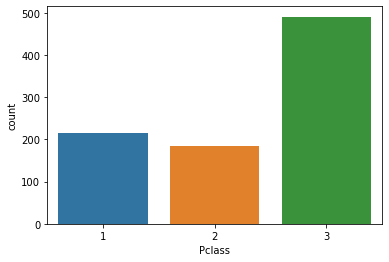

In [1209]:
#Exploring the Pclass column

sns.countplot(data['Pclass'])
data['Pclass'].value_counts()

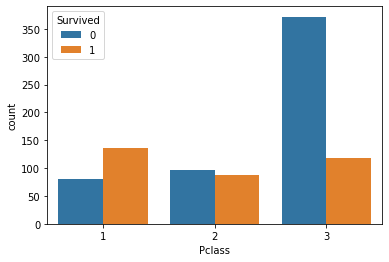

In [1210]:
sns.countplot(data['Pclass'], hue = data['Survived'])

Majority of the passengers belong to Pclass 3, and most of the people in Pclass 3 are non-survivors.

Pclass 2 has an almost equal number of survivors and non-survivors, and Pclass 1 has more survivors than non-survivors.

male      577
female    314
Name: Sex, dtype: int64

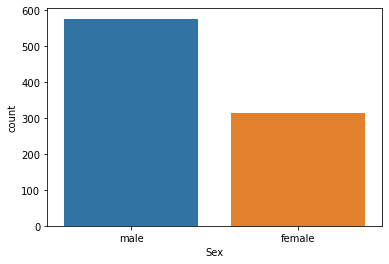

In [1211]:
#Exploring the sex column

sns.countplot(data['Sex'])
data['Sex'].value_counts()

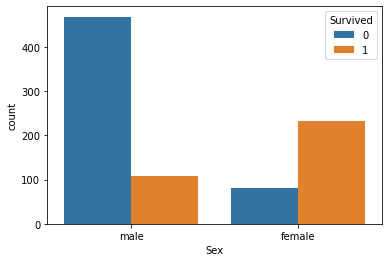

In [1212]:
sns.countplot(data['Sex'], hue = data['Survived'])

Number of male passengers (577) is more than female passengers (314), but survival rate among females is far more than males. 

~240 females out of 314 survived.

The 'Sex' column would have a significant impact on survival rate.

(array([ 50.,  33., 198., 324., 123.,  74.,  50.,  26.,  11.,   2.]),
 array([ 0.,  8., 16., 24., 32., 40., 48., 56., 64., 72., 80.]),
 <a list of 10 Patch objects>)

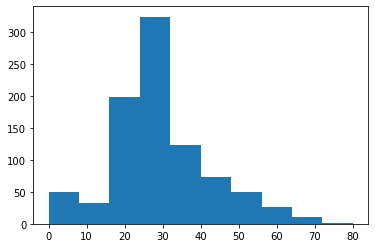

In [1213]:
#exploring the age variable

plt.hist(data['Age'])

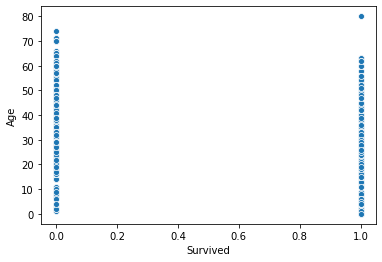

In [1214]:
sns.scatterplot(x = data['Survived'], y = data['Age'])

The age of majority of the passengers is in the range 16-55.

The scatterplot for survivors and non-survivors is not specifically providing any hint.

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

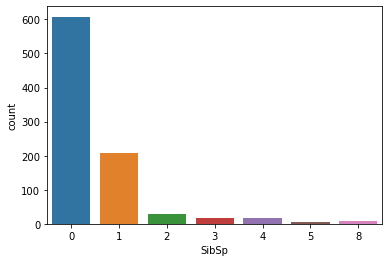

In [1215]:
#Exploring the SibSp variable

sns.countplot(data['SibSp'])
data['SibSp'].value_counts()

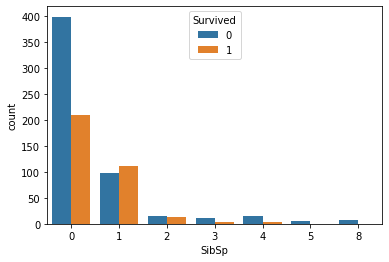

In [1216]:
sns.countplot(data['SibSp'], hue = data['Survived'])

The number of SibSp is maximum as 0, out of which survivors are less than non-survivors (Almost half)

The number of survivors with SibSp as 1 is more as compared to non-survivors.

SibSp value 0 would tend to predicted non-survival of a person.

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

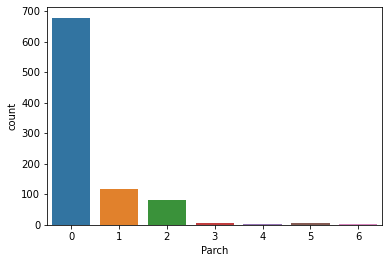

In [1217]:
#Exploring Parch column

sns.countplot(data['Parch'])
data['Parch'].value_counts()

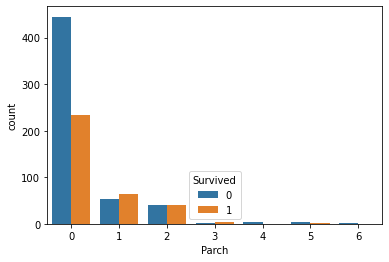

In [1218]:
sns.countplot(data['Parch'], hue = data['Survived'])

Parch and SibSp columns yielded in almost similar results.

There might be a connection between these columns.

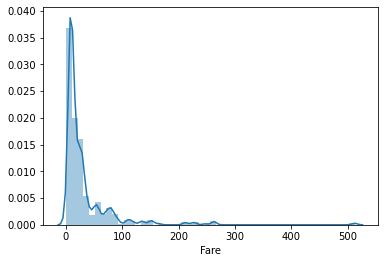

In [1219]:
#Exploring the fare column

sns.distplot(data['Fare'])

The fare ranges maximum between 0 - 50, the passengers with high fare are quite less.

S    646
C    168
Q     77
Name: Embarked, dtype: int64

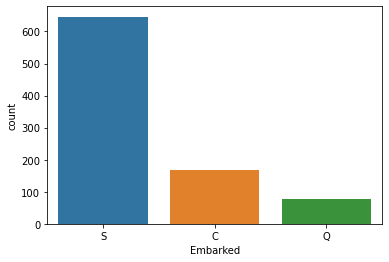

In [1220]:
#Exploring the Embarked column

sns.countplot(data['Embarked'])
data['Embarked'].value_counts()

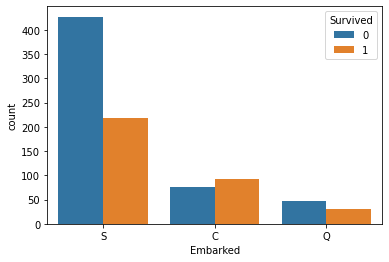

In [1221]:
sns.countplot(data['Embarked'], hue = data['Survived'])

As already observed, Embarked column has maximum values as S, and survivors in this category are less than the non-survivors.

The survivors in C are more than non-survivors, and in case of Q, survivors are little less than non-survivors but not a major diffence.

Highest impact of S values can be observed on death and life ratio.

We will now check the correlation between columns in our data, but before that, we need to encode the alphabetical values.

In [1222]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

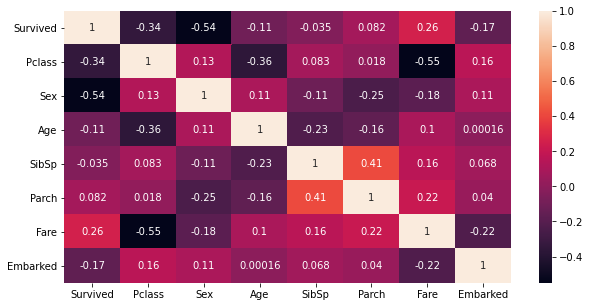

In [1223]:
correlation_data = data.corr()

plt.figure(figsize=(10,5))
sns.heatmap(correlation_data, annot = True)

From the above heatmap, we see that 'Sex' column has the highest impact on survival rate (54%). We have already analysed that female survivors were more than the male survivors.

Pclass also has a significant impact (34%) and Fare has a 26% impact.

Rest of the correlations are quite low.

Pclass and sex are not majorly correlated (13%)

Fare and Pclass are highly correlated (55%)

# Outliers checking

We have 2 numerical columns in our data, Age and Fare, we will be checking if we have any outliers in our data.

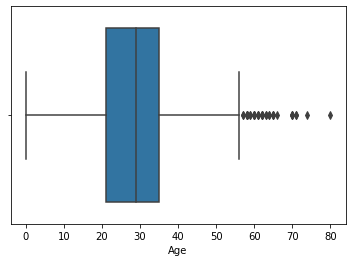

In [1224]:
sns.boxplot(data['Age'])

We observe that although there are outliers in our data, the ages do not show exceptional values. (Outliers are in range 56 - 83 which is a valid age input)

We will not drop these values.

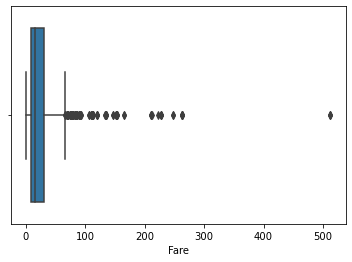

In [1225]:
sns.boxplot(data['Fare'])

In [1226]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [1227]:
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

Survived      0
Pclass        0
Sex           0
Age          35
SibSp        46
Parch       213
Fare        116
Embarked      0
dtype: int64

Dropping the Fare outliers would lead to losing 13% of the data, hence we will not drop these values.

# Skewness treatment

In [1228]:
data['Age'].skew()

0.5103367125156504

In [1229]:
data['Fare'].skew()

4.787316519674893

From the above values, we see that we can keep the Age column as it is as the skewness value is almost on the threshold, but we need to normalize the Fare column skewness.

In [1230]:
data['Fare'] = np.sqrt(data['Fare'])

In [1231]:
data['Fare'].skew()

2.08500441820235

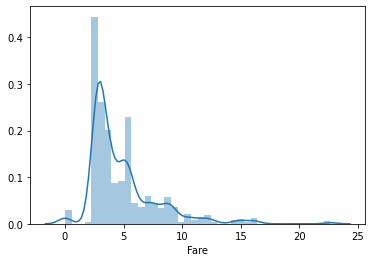

In [1232]:
sns.distplot(data['Fare'])

We will do the sqrt transform again since the skewness is still high

In [1233]:
data['Fare'] = np.sqrt(data['Fare'])

In [1234]:
data['Fare'].skew()

0.519678888206381

The above distribution is near threshold hence we will proceed with the same


# Fitting the classification models

In [1235]:
#Lets check model accuracy on the cleaned data

#Import necessary libraries and packages

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [1236]:
from sklearn.model_selection import train_test_split

In [1237]:
lg = LogisticRegression(max_iter = 50)

In [1238]:
#Define x and y

x = data.drop('Survived', axis = 1)

In [1239]:
y = data.Survived

In [1240]:
#Splitting data into train and test data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 42)

In [1241]:
#Check size of train and test data
x_train.shape


(623, 7)

In [1242]:
y_train.shape

(623,)

In [1243]:
lg.fit(x_train, y_train)
pred = lg.predict(x_test)
print('Accuracy test = ', accuracy_score(y_test, pred))
print('Accuracy train = ', accuracy_score(y_train, lg.predict(x_train) ))
print('Confusion matrix', confusion_matrix(y_test, pred))
print('Classification report', classification_report(y_test, pred))

Accuracy test =  0.8171641791044776
Accuracy train =  0.8041733547351525
Confusion matrix [[138  19]
 [ 30  81]]
Classification report               precision    recall  f1-score   support

           0       0.82      0.88      0.85       157
           1       0.81      0.73      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



In [1244]:
#Lets try to use other ML models to check how accurately we find the survivors

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [1245]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
predknn = knn.predict(x_test)
print('Accuracy test = ', accuracy_score(y_test, predknn))
print('Accuracy train = ', accuracy_score(y_train, knn.predict(x_train) ))
print('Confusion matrix', confusion_matrix(y_test, predknn))
print('Classification report', classification_report(y_test, predknn))

Accuracy test =  0.7761194029850746
Accuracy train =  0.8298555377207063
Confusion matrix [[142  15]
 [ 45  66]]
Classification report               precision    recall  f1-score   support

           0       0.76      0.90      0.83       157
           1       0.81      0.59      0.69       111

    accuracy                           0.78       268
   macro avg       0.79      0.75      0.76       268
weighted avg       0.78      0.78      0.77       268



In [1246]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
predgnb = gnb.predict(x_test)
print('Accuracy test = ', accuracy_score(y_test, predgnb))
print('Accuracy train = ', accuracy_score(y_train, gnb.predict(x_train) ))
print('Confusion matrix', confusion_matrix(y_test, predgnb))
print('Classification report', classification_report(y_test, predgnb))

Accuracy test =  0.7798507462686567
Accuracy train =  0.7768860353130016
Confusion matrix [[122  35]
 [ 24  87]]
Classification report               precision    recall  f1-score   support

           0       0.84      0.78      0.81       157
           1       0.71      0.78      0.75       111

    accuracy                           0.78       268
   macro avg       0.77      0.78      0.78       268
weighted avg       0.78      0.78      0.78       268



In [1247]:
svm = SVC()
svm.fit(x_train, y_train)
predsvm = svm.predict(x_test)
print('Accuracy test = ', accuracy_score(y_test, predsvm))
print('Accuracy train = ', accuracy_score(y_train, svm.predict(x_train) ))
print('Confusion matrix', confusion_matrix(y_test, predsvm))
print('Classification report', classification_report(y_test, predsvm))

Accuracy test =  0.6007462686567164
Accuracy train =  0.6565008025682183
Confusion matrix [[153   4]
 [103   8]]
Classification report               precision    recall  f1-score   support

           0       0.60      0.97      0.74       157
           1       0.67      0.07      0.13       111

    accuracy                           0.60       268
   macro avg       0.63      0.52      0.44       268
weighted avg       0.63      0.60      0.49       268



Out of all the above models, Logistic regression is performing the best, and not showing overfitting on train data. Hence we will select this model

# Ensemble methods

In [1248]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
print('Accuracy test = ', accuracy_score(y_test, predrf))
print('Accuracy train = ', accuracy_score(y_train, rf.predict(x_train) ))
print('Confusion matrix', confusion_matrix(y_test, predrf))
print('Classification report', classification_report(y_test, predrf))

Accuracy test =  0.8134328358208955
Accuracy train =  0.9807383627608347
Confusion matrix [[134  23]
 [ 27  84]]
Classification report               precision    recall  f1-score   support

           0       0.83      0.85      0.84       157
           1       0.79      0.76      0.77       111

    accuracy                           0.81       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.81      0.81      0.81       268



The Random forest classifier shows overfitting on train data, hence we will not select this model

# Cross validation

In [1249]:
from sklearn.model_selection import cross_val_score

In [1250]:
for i in [lg, rf, knn, gnb, svm]:
    cv = cross_val_score(i, x, y, cv=5, scoring = 'accuracy')
    print(i, cv.mean())

LogisticRegression(max_iter=50) 0.7979850605737242
RandomForestClassifier() 0.8316929257422636
KNeighborsClassifier() 0.7957567007720796
GaussianNB() 0.7699830519113677
SVC() 0.652099679869437


The cross validation results show that the models are not overfitting, and are giving similar results as other classification models.

# Hyper tuning

In [1251]:
from sklearn.model_selection import GridSearchCV

In [1252]:
lg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 50,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [1253]:
gcv_lg = GridSearchCV(lg,{"penalty":["l1","l2","elasticnet","none"],'C':[1,10], 'fit_intercept' : [True, False], 'max_iter':[1,50,100]})

In [1254]:
gcv_result = gcv_lg.fit(x_train,y_train)

In [1255]:
gcv_result.best_params_

{'C': 1, 'fit_intercept': True, 'max_iter': 50, 'penalty': 'l2'}

In [1256]:
gcv_result.best_score_

0.8057548387096775

The default params are the performing the best, except max_iter, hence we will change the value of the parameter in our model to hypertune it.

# AUC ROC curve

In [1257]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_prob = lg.predict_proba(x_test)[:,1]

fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)


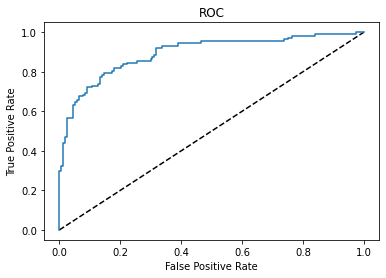

In [1258]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [1259]:
auc_score = roc_auc_score(y_test,lg.predict(x_test))

In [1260]:
print(auc_score)

0.8043553107247375


We get a good AUC score here.

# Saving the best model

In [1261]:
import joblib

In [1262]:
joblib.dump(lg,'titanic.obj')

['titanic.obj']

# Conclusion

We have prepared a Titanic prediction model with 80% accuracy, which predicts the survival possibility of the passengers in Titanic by checking various factors which impact survival rate

In [1263]:
check = joblib.load('titanic.obj')

In [1264]:
prediction = check.predict(x_test)
accuracy_score(y_test,prediction)

0.8171641791044776

In [1265]:
result = pd.DataFrame({'Actual':y_test,'Predicted':prediction})

In [1266]:
result

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,1
...,...,...
821,1,0
633,0,0
456,0,0
500,0,0
